# More Models

## DBSCAN

In [2]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [4]:
from sklearn.datasets import make_moons

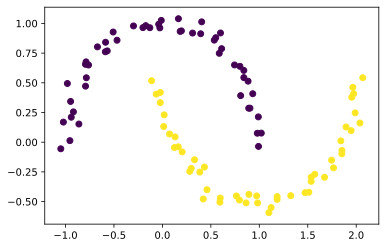

In [5]:
moons=make_moons(n_samples=100, shuffle=True, noise=0.05)

plt.scatter(moons[0][:,0], moons[0][:,1], c=moons[1]);

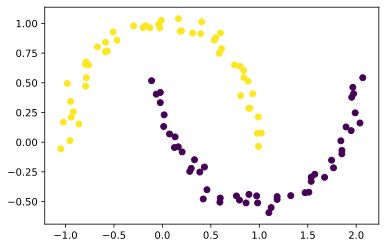

In [7]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.25)
dbscan.fit(moons[0])

plt.scatter(moons[0][:,0], moons[0][:,1], c=dbscan.labels_);

In [8]:
dbscan.labels_

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0])

## HDBSCAN

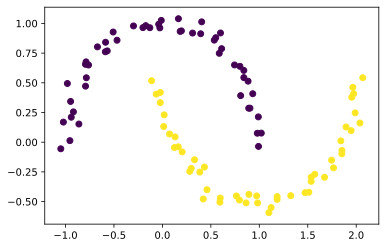

In [9]:
from hdbscan import HDBSCAN

hdbscan=HDBSCAN(gen_min_span_tree=True)
hdbscan.fit(moons[0])

plt.scatter(moons[0][:,0], moons[0][:,1], c=hdbscan.labels_);

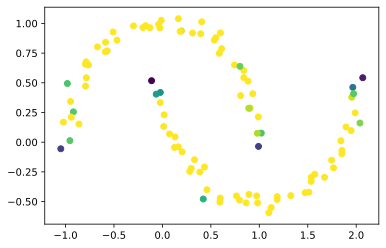

In [10]:
plt.scatter(moons[0][:,0], moons[0][:,1], c=hdbscan.probabilities_);

In [11]:
hdbscan.probabilities_

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.78263431, 1.        , 1.        , 1.        ,
       0.88128785, 1.        , 0.87433109, 1.        , 0.87604668,
       1.        , 0.55778113, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.83921906, 0.64095436, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.73094041,
       0.79872948, 0.97015726, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.94493713, 0.88128785,
       0.96323345, 1.        , 1.        , 1.        , 0.64091889,
       1.        , 1.        , 1.        , 1.        , 0.97008667,
       1.        , 1.        , 1.        , 1.        , 0.91379633,
       1.        , 1.        , 0.89896622, 1.        , 1.     

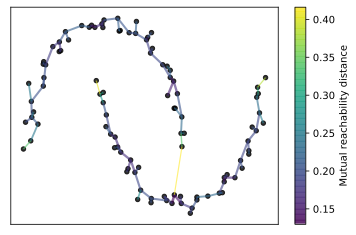

In [13]:
hdbscan.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                    edge_alpha=0.6,
                                    node_size=20,
                                    edge_linewidth=1.2);

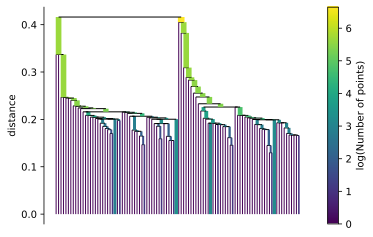

In [15]:
hdbscan.single_linkage_tree_.plot(cmap='viridis',
                                  colorbar=True);

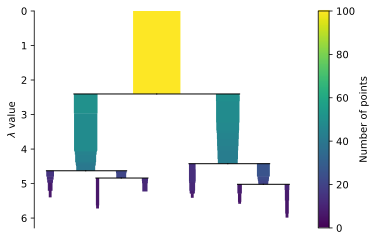

In [16]:
hdbscan.condensed_tree_.plot();

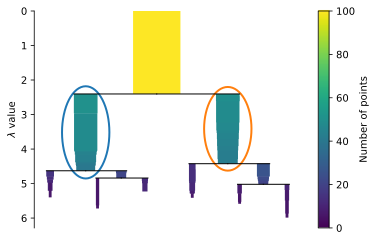

In [20]:
import seaborn as sns
hdbscan.condensed_tree_.plot(select_clusters=True, 
                             selection_palette=sns.color_palette());

## OPTICS

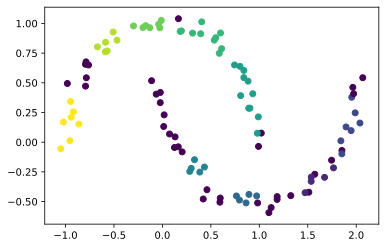

In [27]:
from sklearn.cluster import OPTICS


opt=OPTICS(max_eps=3)
opt.fit(moons[0])

plt.scatter(moons[0][:,0], moons[0][:,1], c=opt.labels_);

## GMM

In [28]:
from sklearn.mixture import GaussianMixture as GMM

gm=GMM(n_components=2, covariance_type='full')
gm.fit(moons[0])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [29]:
gm.means_

array([[ 1.09529055, -0.1093423 ],
       [-0.17731713,  0.64912413]])

In [30]:
gm.covariances_

array([[[0.3732479 , 0.04700589],
        [0.04700589, 0.11240668]],

       [[0.33821761, 0.07551763],
        [0.07551763, 0.0974691 ]]])

In [31]:
gm.predict_proba(moons[0])[:5]

array([[9.99999780e-01, 2.20059436e-07],
       [4.65927277e-01, 5.34072723e-01],
       [6.48476700e-03, 9.93515233e-01],
       [6.00569645e-04, 9.99399430e-01],
       [7.83862790e-01, 2.16137210e-01]])

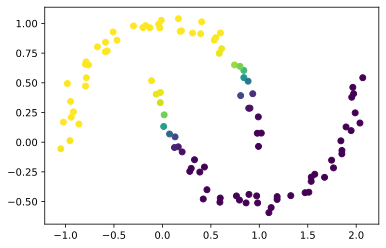

In [32]:
plt.scatter(moons[0][:,0], moons[0][:,1], c=gm.predict_proba(moons[0])[:,1]);

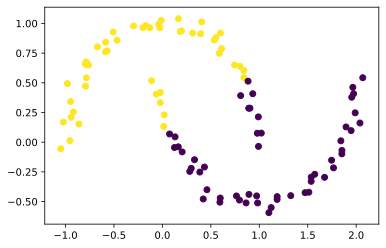

In [33]:
plt.scatter(moons[0][:,0], moons[0][:,1], c=gm.predict(moons[0]));

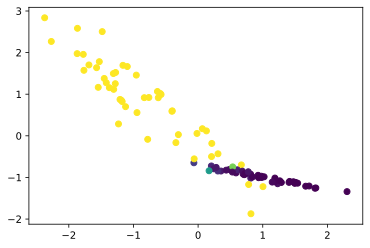

In [49]:
from sklearn.datasets import make_classification

X=make_classification(n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1)

gm.fit(X[0])
plt.scatter(X[0][:,0], X[0][:,1], c=gm.predict_proba(X[0])[:,1]);

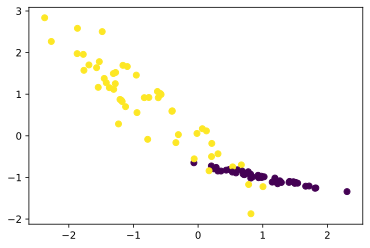

In [50]:
plt.scatter(X[0][:,0], X[0][:,1], c=gm.predict(X[0]));

In [51]:
gm.predict(X[0])

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1])

# Guided Lesson (clusterizacion de transacciones)

In [52]:
import pandas as pd
import numpy as np

In [54]:
breadbasket=pd.read_csv('data/breadbasket_dms.csv')
breadbasket.head()

Date      Time  Transaction           Item
0  2016-10-30  09:58:11            1          Bread
1  2016-10-30  10:05:34            2   Scandinavian
2  2016-10-30  10:05:34            2   Scandinavian
3  2016-10-30  10:07:57            3  Hot chocolate
4  2016-10-30  10:07:57            3            Jam

In [55]:
breadbasket.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 4.1 MB


In [56]:
breadbasket.describe()

Transaction
count  21293.000000
mean    4951.990889
std     2787.758400
min        1.000000
25%     2548.000000
50%     5067.000000
75%     7329.000000
max     9684.000000

In [57]:
breadbasket['DateTime']=pd.to_datetime(breadbasket.Date+' '+breadbasket.Time,
                                      format='%Y-%m-%d %H:%M:%S')

In [58]:
breadbasket.head()

Date      Time  Transaction           Item            DateTime
0  2016-10-30  09:58:11            1          Bread 2016-10-30 09:58:11
1  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34
2  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34
3  2016-10-30  10:07:57            3  Hot chocolate 2016-10-30 10:07:57
4  2016-10-30  10:07:57            3            Jam 2016-10-30 10:07:57

In [59]:
breadbasket.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [60]:
breadbasket.Item.nunique()

95

In [62]:
beverage = ['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies']
other = ['NONE', 'Christmas common', 'Gift voucher', "Valentine's card", 'Tshirt', 'Afternoon with the baker', 'Postcard', 'Siblings', 'Nomad bag', 'Adjustment', 'Drinking chocolate spoons ', 'Coffee granules ']
kids = ["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit']
snacks = ['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars']
bread = ['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian']
breakfast_pastry = ['Muffin', 'Pastry', 'Medialuna', 'Scone']
dessert = ['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone']
condiments = ['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil']
breakfast = ['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami']
lunch = ['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']

food=beverage+other+kids+snacks+bread+breakfast_pastry+dessert+condiments+breakfast+lunch

other_food=[e for e in breadbasket.Item.unique() if e not in food]

food_list=[beverage, other, kids, snacks, bread, breakfast_pastry, dessert, condiments, breakfast, lunch]
food_names=['beverage', 'other', 'kids', 'snacks', 'bread', 'breakfast_pastry', 'dessert', 'condiments', 'breakfast', 'lunch']

for i in range(len(food_names)):
    breadbasket[food_names[i]]=np.where(breadbasket.Item.isin(food_list[i]), 1, 0)
    
breadbasket.head()

Date      Time  Transaction           Item            DateTime  \
0  2016-10-30  09:58:11            1          Bread 2016-10-30 09:58:11   
1  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
2  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
3  2016-10-30  10:07:57            3  Hot chocolate 2016-10-30 10:07:57   
4  2016-10-30  10:07:57            3            Jam 2016-10-30 10:07:57   

   beverage  other  kids  snacks  bread  breakfast_pastry  dessert  \
0         0      0     0       0      1                 0        0   
1         0      0     0       0      1                 0        0   
2         0      0     0       0      1                 0        0   
3         1      0     0       0      0                 0        0   
4         0      0     0       0      0                 0        0   

   condiments  breakfast  lunch  
0           0          0      0  
1           0          0      0  
2           0          0      0  
3           0          0      0  
4           1          0      0

In [63]:
bread_group=breadbasket.groupby(['DateTime', 'Transaction']).sum()

bread_group.head()

beverage  other  kids  snacks  bread  \
DateTime            Transaction                                         
2016-10-30 09:58:11 1                   0      0     0       0      1   
2016-10-30 10:05:34 2                   0      0     0       0      2   
2016-10-30 10:07:57 3                   1      0     0       0      0   
2016-10-30 10:08:41 4                   0      0     0       0      0   
2016-10-30 10:13:03 5                   1      0     0       0      1   

                                 breakfast_pastry  dessert  condiments  \
DateTime            Transaction                                          
2016-10-30 09:58:11 1                           0        0           0   
2016-10-30 10:05:34 2                           0        0           0   
2016-10-30 10:07:57 3                           0        1           1   
2016-10-30 10:08:41 4                           1        0           0   
2016-10-30 10:13:03 5                           1        0           0   

                                 breakfast  lunch  
DateTime            Transaction                    
2016-10-30 09:58:11 1                    0      0  
2016-10-30 10:05:34 2                    0      0  
2016-10-30 10:07:57 3                    0      0  
2016-10-30 10:08:41 4                    0      0  
2016-10-30 10:13:03 5                    0      0

In [64]:
bread_group.reset_index(level='DateTime', inplace=True)
bread_group.head()

DateTime  beverage  other  kids  snacks  bread  \
Transaction                                                             
1           2016-10-30 09:58:11         0      0     0       0      1   
2           2016-10-30 10:05:34         0      0     0       0      2   
3           2016-10-30 10:07:57         1      0     0       0      0   
4           2016-10-30 10:08:41         0      0     0       0      0   
5           2016-10-30 10:13:03         1      0     0       0      1   

             breakfast_pastry  dessert  condiments  breakfast  lunch  
Transaction                                                           
1                           0        0           0          0      0  
2                           0        0           0          0      0  
3                           0        1           1          0      0  
4                           1        0           0          0      0  
5                           1        0           0          0      0

In [65]:
bread_group['day']=bread_group.DateTime.dt.day_name()
bread_group['hour']=bread_group.DateTime.dt.hour
bread_group.head()

DateTime  beverage  other  kids  snacks  bread  \
Transaction                                                             
1           2016-10-30 09:58:11         0      0     0       0      1   
2           2016-10-30 10:05:34         0      0     0       0      2   
3           2016-10-30 10:07:57         1      0     0       0      0   
4           2016-10-30 10:08:41         0      0     0       0      0   
5           2016-10-30 10:13:03         1      0     0       0      1   

             breakfast_pastry  dessert  condiments  breakfast  lunch     day  \
Transaction                                                                    
1                           0        0           0          0      0  Sunday   
2                           0        0           0          0      0  Sunday   
3                           0        1           1          0      0  Sunday   
4                           1        0           0          0      0  Sunday   
5                           1        0           0          0      0  Sunday   

             hour  
Transaction        
1               9  
2              10  
3              10  
4              10  
5              10

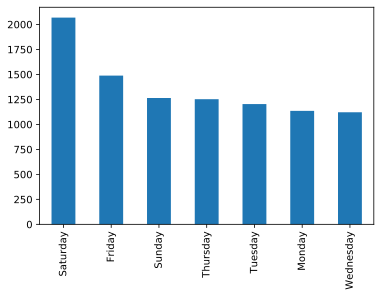

In [67]:
bread_group.day.value_counts().plot(kind='bar');

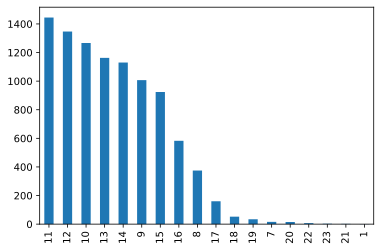

In [68]:
bread_group.hour.value_counts().plot.bar();

In [69]:
bread_dummy=pd.get_dummies(data=bread_group, columns=['day']).drop('DateTime', axis=1)
bread_dummy.head()

beverage  other  kids  snacks  bread  breakfast_pastry  dessert  \
Transaction                                                                    
1                   0      0     0       0      1                 0        0   
2                   0      0     0       0      2                 0        0   
3                   1      0     0       0      0                 0        1   
4                   0      0     0       0      0                 1        0   
5                   1      0     0       0      1                 1        0   

             condiments  breakfast  lunch  hour  day_Friday  day_Monday  \
Transaction                                                               
1                     0          0      0     9           0           0   
2                     0          0      0    10           0           0   
3                     1          0      0    10           0           0   
4                     0          0      0    10           0           0   
5                     0          0      0    10           0           0   

             day_Saturday  day_Sunday  day_Thursday  day_Tuesday  \
Transaction                                                        
1                       0           1             0            0   
2                       0           1             0            0   
3                       0           1             0            0   
4                       0           1             0            0   
5                       0           1             0            0   

             day_Wednesday  
Transaction                 
1                        0  
2                        0  
3                        0  
4                        0  
5                        0

In [71]:
# PCA
from sklearn.decomposition import PCA

pca=PCA(n_components=4).fit_transform(bread_dummy)

pc_df=pd.DataFrame(pca, columns=[f'pc_{i+1}' for i in range(4)])
pc_df.head()

pc_1      pc_2      pc_3      pc_4
0  3.197022 -0.925271  0.243811  0.005067
1  2.227490 -1.272567  1.182276 -0.163726
2  2.107261  0.426310 -0.220287  0.880676
3  2.198567 -0.579301 -0.795211 -0.027811
4  2.206414  0.039266  0.431598 -0.335133

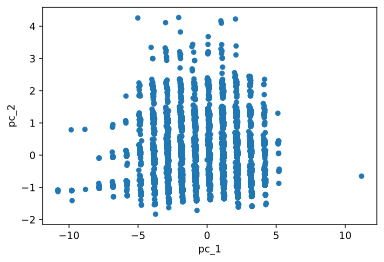

In [73]:
pc_df.plot.scatter(x='pc_1', y='pc_2');

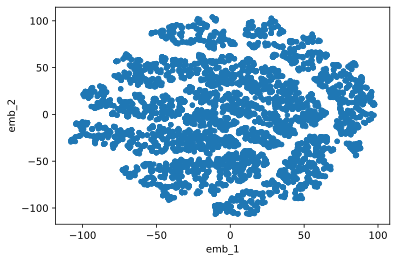

In [75]:
# t-SNE

from sklearn.manifold import TSNE

tsne=TSNE(n_components=2, perplexity=15).fit_transform(bread_dummy)
emb_df=pd.DataFrame(tsne, columns=['emb_1', 'emb_2'])
emb_df.plot.scatter(x='emb_1', y='emb_2');

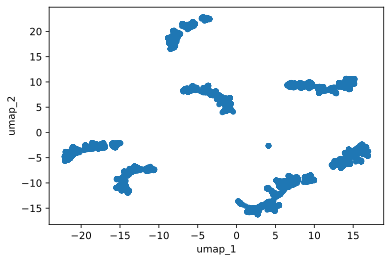

In [76]:
# UMAP

import warnings
warnings.simplefilter('ignore')
from umap import UMAP

umap=UMAP(n_components=2).fit_transform(bread_dummy)
umap_df=pd.DataFrame(umap, columns=['umap_1', 'umap_2'])
umap_df.plot.scatter(x='umap_1', y='umap_2');

In [79]:
# Clustering

# K-Means
cm=sns.light_palette('green', as_cmap=True)

from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3).fit(pc_df)

In [78]:
kmeans.cluster_centers_

array([[ 2.29484577e-01,  6.07294512e-03, -1.12082036e-02,
        -4.50084644e-03],
       [-2.92222674e+00,  6.78864645e-04,  1.70236447e-02,
         6.18963065e-03],
       [ 2.84923792e+00, -9.75018532e-03, -1.95437395e-03,
        -7.91363524e-05]])

In [81]:
bread_group['label']=kmeans.predict(pc_df)
bread_merge=breadbasket.merge(bread_group.reset_index()[['label', 'Transaction']],
                             on='Transaction', how='left')
pd.crosstab(bread_group.hour, bread_group.label).style.background_gradient(cmap=cm)

In [82]:
pd.crosstab(bread_group.day, bread_group.label).style.background_gradient(cmap=cm)

In [83]:
bread_merge.groupby('label')['Item'].value_counts().to_frame('counts').reset_index()\
           .set_index('Item').groupby('label')['counts'].nlargest()

label  Item     
0      Coffee       2293
       Bread        1342
       Tea           540
       Sandwich      449
       NONE          440
1      Coffee       1563
       Bread         901
       Tea           615
       Cake          510
       Sandwich      280
2      Coffee       1615
       Bread        1082
       Pastry        453
       Medialuna     294
       Tea           280
Name: counts, dtype: int64

In [84]:
# DBSCAN

dbscan=DBSCAN()
bread_group['label']=dbscan.fit_predict(pc_df)
bread_merge=breadbasket.merge(bread_group.reset_index()[['label', 'Transaction']],
                             on='Transaction', how='left')
pd.crosstab(bread_group.hour, bread_group.label).style.background_gradient(cmap=cm)

In [85]:
pd.crosstab(bread_group.day, bread_group.label).style.background_gradient(cmap=cm)

In [91]:
bread_merge.groupby('label')['Item'].value_counts().to_frame('counts').reset_index()\
           .set_index('Item').groupby('label')['counts'].nlargest(10)

label  Item       
-1     Coffee         366
       Bread          279
       Cake           137
       Cookies        107
       Tea            103
                     ... 
 184   Alfajores        1
       Cookies          1
       Juice            1
       Scone            1
 185   Vegan Feast      5
Name: counts, Length: 1774, dtype: int64

In [92]:
# HDBSCAN

hdbscan=HDBSCAN(min_cluster_size=25)
bread_group['label']=hdbscan.fit_predict(pc_df)
bread_merge=breadbasket.merge(bread_group.reset_index()[['label', 'Transaction']],
                             on='Transaction', how='left')
pd.crosstab(bread_group.hour, bread_group.label).style.background_gradient(cmap=cm)

In [93]:
pd.crosstab(bread_group.day, bread_group.label).style.background_gradient(cmap=cm)

In [95]:
# GMM
from sklearn.mixture import GaussianMixture as GM

gm=GM(n_components=4, covariance_type='full')
bread_group['label']=gm.fit_predict(pc_df)
bread_merge=breadbasket.merge(bread_group.reset_index()[['label', 'Transaction']],
                             on='Transaction', how='left')
pd.crosstab(bread_group.hour, bread_group.label).style.background_gradient(cmap=cm)

In [96]:
pd.crosstab(bread_group.day, bread_group.label).style.background_gradient(cmap=cm)

In [97]:
bread_merge.groupby('label')['Item'].value_counts().to_frame('counts').reset_index()\
           .set_index('Item').groupby('label')['counts'].nlargest()

label  Item     
0      Coffee       2232
       Bread        1868
       Tea           518
       Sandwich      308
       NONE          298
1      Coffee       1156
       Cake          746
       Bread         516
       Cookies       368
       Tea           355
2      Coffee       1743
       Bread         820
       Pastry        710
       Medialuna     490
       Tea           435
3      Coffee        340
       Cake          279
       Cookies       172
       Alfajores     156
       Tea           127
Name: counts, dtype: int64